# BeamNN Eval A/B Testing UI Generation

Later on, we can choose to use jsPsych instead of Google Sheets

In [1]:
# for each model
# for each scan_battery
# for each target
# per target, we rank, e.g.,

# [,
#   model_1_target_1_cnn, (beter than cnn)
#   target_1_dnn_benchmark
#   model_2_target_1_cnn, 
#   target_1_das_benchmark,
#   model_3_target_1_cnn (worse than cnn),
# ]

# so we need 5*4/2 = 10 unordered 2-combination comparisons

# (model_1_target_1_cnn, target_1_dnn_benchmark)
# (model_1_target_1_cnn, model_2_target_1_cnn)
# (model_1_target_1_cnn, target_1_das_benchmark)
# (model_1_target_1_cnn, model_3_target_1_cnn)
# (target_1_dnn_benchmark, model_2_target_1_cnn)
# (target_1_dnn_benchmark, target_1_das_benchmark)
# (target_1_dnn_benchmark, model_3_target_1_cnn)
# (model_2_target_1_cnn, target_1_das_benchmark)
# (model_2_target_1_cnn, model_3_target_1_cnn)
# (target_1_das_benchmark, model_3_target_1_cnn)

# At presentation time, the order of the two can be reversed at random.

# 

# 1. Generate 2 combinations

In [2]:
# 1. For each target, grab all models cnns, and append a. dnn benchmark, b. das benchmark

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import glob

import matplotlib.pyplot as plt
# import cv2
from cv2 import imread
import pandas as pd
from PIL import Image

from analysis_utils import get_df, inspect_model_by_name, compare_two_models

In [4]:
import warnings
warnings.filterwarnings('error')
warnings.filterwarnings("ignore", category=DeprecationWarning)

identifier = '*'

if not 'models_df' in vars() or 'models_df' in globals():
    models_df = get_df(identifier)

In [5]:
models_df_sample_50 = models_df.sample(n=50)

In [6]:
from io import BytesIO

SCAN_BATTERIES_DIRNAME = '../scan_batteries'
DNN_BENCHMARK_MODEL_NAME = 'dnn_benchmark_1528225522_72'

# each row represent one target

columns = [
    'target_name', # identify the target
    'scan_battery_name', # identify the target
    'model_name',
    'das_benchmark',
    'dnn_benchmark',
    # Then there are many dynamically added columns that represent each model, such as 
    # 'model_1_cnn',
    # 'model_2_cnn',
]

# TODO: Two-Column (scan_battery_name, target_name) indexing because target numbers are not unique.
# TODO: Store image bytes intead of image object pointers.

images_per_target_df = pd.DataFrame(columns=columns)

# images_per_target_df['target_name'].astype(str) # useless
images_per_target_df.set_index('target_name', inplace=True)


# Build the 
for scan_battery_dirname in glob.glob(os.path.join(SCAN_BATTERIES_DIRNAME, "*/")):
#     print()
    scan_battery_name = os.path.basename(os.path.dirname(scan_battery_dirname))
#     print('scan_battery_dirname =', scan_battery_dirname)
#     print('scan_battery_name =', scan_battery_name)
    target_path = os.path.join(scan_battery_dirname, "target*")
#     print('target_path =', target_path)
    for target_dir in glob.glob(target_path):
#         print('target_dir =', target_dir)
        target_name = os.path.basename(target_dir)
#         print('target_name =', target_name)
        images_per_target_df.at[target_name, 'scan_battery_name'] = scan_battery_name
    
        # TODO: wait for Adam to share simulation benchmark. Currently that scan_battery is missing
#         dnn_benchmark_image_fname_abs = os.path.abspath(os.path.join('..', 'DNNs', DNN_BENCHMARK_MODEL_NAME, 'scan_batteries', scan_battery_name, target_name, 'dnn.png'))
#         images_per_target_df.at[target_name, 'dnn_benchmark'] = Image.open(dnn_benchmark_image_fname_abs)
        
        for model_index, model_row in models_df_sample_50.iterrows():
#             print(model_index)
            model_name = model_row['name']
            model_cnn_image_colname = model_name + '_cnn_image'
            if model_cnn_image_colname not in images_per_target_df:
                images_per_target_df[model_cnn_image_colname] = pd.Series(dtype=object)
            
            cnn_image_fname_abs = os.path.abspath(os.path.join('..', 'DNNs', model_name, 'scan_batteries', scan_battery_name, target_name, 'dnn.png'))
#             print('cnn_image_fname_abs =', cnn_image_fname_abs)
#             images_per_target_df.loc[target_name, 'cnn_file'] = images_per_target.name.map(lambda name: f'../DNNs/{name}/{scan}/dnn.jpg')

#             images_per_target_df.loc[target_name, model_name + '_cnn_image_fname'] = cnn_image_fname
            images_per_target_df.at[target_name, 'model_name'] = model_name
#             image = imread(cnn_image_fname_abs)
            # BUG: Can't open PIL because it causes "too many files open". MUST save as bytes to close it.
#             with Image.open(cnn_image_fname_abs) as image:
#                 with BytesIO() as imgByteArr:
#                     image.save(imgByteArr, format='PNG')
#                     images_per_target_df.at[target_name, model_cnn_image_colname] = imgByteArr
#             image = Image.open(cnn_image_fname_abs) # BUG: Unknown error using Image.open in loop
            image = imread(cnn_image_fname_abs)
            images_per_target_df.at[target_name, model_cnn_image_colname] = image
            
#             with Image.open(cnn_image_fname_abs) as image:
#                 images_per_target_df.at[target_name, model_cnn_image_colname] = image
                
            
#             print('type(image) =', type(image))
#             images_per_target_df.at[target_name, model_name + '_cnn_image'] = image # NOTE: this causes weird error message.

        # Problem is that if we use this approach, we'd have to compare all models. Or 50 at a time. Thus comparisons are always relative within a group, plus benchmarks. The key is don't do any string manipulation inside loc[].
        
        

In [7]:
images_per_target_df

,scan_battery_name,model_name,das_benchmark,dnn_benchmark,20180801163205_32_evaluated_cnn_image,20181025215535_278_evaluated_cnn_image,20180709112043_30_evaluated_cnn_image,20180718164411_33_evaluated_cnn_image,20181025215535_326_evaluated_cnn_image,20181018100714_9_evaluated_cnn_image,...,20181025215535_380_evaluated_cnn_image,20181025215535_94_evaluated_cnn_image,20180718164411_12_evaluated_cnn_image,20180706214952_16_evaluated_cnn_image,20181018100714_45_evaluated_cnn_image,20181021132748_8_evaluated_cnn_image,20180801163205_28_evaluated_cnn_image,20181016023040_20_evaluated_cnn_image,20181018100714_19_evaluated_cnn_image,20181018100714_40_evaluated_cnn_image
target_name,,,,,,,,,,,,,,,,,,,,,
target_17,target_in_vivo,20181018100714_40_evaluated,NaN,NaN,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...",...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
target_19,target_in_vivo,20181018100714_40_evaluated,NaN,NaN,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...",...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
target_5_SNR_10dB,target_anechoic_cyst_5mm,20181018100714_40_evaluated,NaN,NaN,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...",...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
target_4_SNR_10dB,target_anechoic_cyst_5mm,20181018100714_40_evaluated,NaN,NaN,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...",...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255],

In [8]:
images_per_target_df.dtypes

scan_battery_name                         object
model_name                                object
das_benchmark                             object
dnn_benchmark                             object
20180801163205_32_evaluated_cnn_image     object
20181025215535_278_evaluated_cnn_image    object
20180709112043_30_evaluated_cnn_image     object
20180718164411_33_evaluated_cnn_image     object
20181025215535_326_evaluated_cnn_image    object
20181018100714_9_evaluated_cnn_image      object
20181025215535_409_evaluated_cnn_image    object
20180705164352_43_evaluated_cnn_image     object
20180801163205_25_evaluated_cnn_image     object
20181002150342_24_evaluated_cnn_image     object
20181025215535_374_evaluated_cnn_image    object
20180706214952_41_evaluated_cnn_image     object
20181025215535_209_evaluated_cnn_image    object
20181025215535_271_evaluated_cnn_image    object
20180928201821_18_evaluated_cnn_image     object
20181021132748_23_evaluated_cnn_image     object
20180928201821_31_ev

In [9]:
# Pick two combinations

candidate_images = list(images_per_target_df)

In [10]:
list(images_per_target_df)

['scan_battery_name',
 'model_name',
 'das_benchmark',
 'dnn_benchmark',
 '20180801163205_32_evaluated_cnn_image',
 '20181025215535_278_evaluated_cnn_image',
 '20180709112043_30_evaluated_cnn_image',
 '20180718164411_33_evaluated_cnn_image',
 '20181025215535_326_evaluated_cnn_image',
 '20181018100714_9_evaluated_cnn_image',
 '20181025215535_409_evaluated_cnn_image',
 '20180705164352_43_evaluated_cnn_image',
 '20180801163205_25_evaluated_cnn_image',
 '20181002150342_24_evaluated_cnn_image',
 '20181025215535_374_evaluated_cnn_image',
 '20180706214952_41_evaluated_cnn_image',
 '20181025215535_209_evaluated_cnn_image',
 '20181025215535_271_evaluated_cnn_image',
 '20180928201821_18_evaluated_cnn_image',
 '20181021132748_23_evaluated_cnn_image',
 '20180928201821_31_evaluated_cnn_image',
 '20180718164411_4_evaluated_cnn_image',
 '20181025215535_350_evaluated_cnn_image',
 '20181025215535_47_evaluated_cnn_image',
 '20180706214952_17_evaluated_cnn_image',
 '20180801163205_29_evaluated_cnn_image'

In [11]:
import itertools

# list(itertools.combinations(candidate_images, 2))
list(itertools.combinations([1, 2, 3, 4], 2))


[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

In [12]:
images_per_target_df

,scan_battery_name,model_name,das_benchmark,dnn_benchmark,20180801163205_32_evaluated_cnn_image,20181025215535_278_evaluated_cnn_image,20180709112043_30_evaluated_cnn_image,20180718164411_33_evaluated_cnn_image,20181025215535_326_evaluated_cnn_image,20181018100714_9_evaluated_cnn_image,...,20181025215535_380_evaluated_cnn_image,20181025215535_94_evaluated_cnn_image,20180718164411_12_evaluated_cnn_image,20180706214952_16_evaluated_cnn_image,20181018100714_45_evaluated_cnn_image,20181021132748_8_evaluated_cnn_image,20180801163205_28_evaluated_cnn_image,20181016023040_20_evaluated_cnn_image,20181018100714_19_evaluated_cnn_image,20181018100714_40_evaluated_cnn_image
target_name,,,,,,,,,,,,,,,,,,,,,
target_17,target_in_vivo,20181018100714_40_evaluated,NaN,NaN,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...",...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
target_19,target_in_vivo,20181018100714_40_evaluated,NaN,NaN,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...",...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
target_5_SNR_10dB,target_anechoic_cyst_5mm,20181018100714_40_evaluated,NaN,NaN,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...",...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
target_4_SNR_10dB,target_anechoic_cyst_5mm,20181018100714_40_evaluated,NaN,NaN,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...",...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255],

In [13]:
import base64
from IPython.display import HTML

pd.set_option('display.max_colwidth', -1)


# def get_thumbnail(path):
#     i = Image.open(path)
#     i.thumbnail((150, 150), Image.LANCZOS)
#     return i

def image_formatter(im):
    print('lol')
    return f'<img src="data:image/png;base64,{image_base64(im)}">'

def image_base64(im):
#     if isinstance(im, str):
#         im = get_thumbnail(im)
    with BytesIO() as buffer:
#         im = get_thumbnail(im)
#         im.save(buffer, 'png')
        plt.imshow(im)
        plt.savefig(buffer, format='png')
        buffer.seek(0)
        return base64.b64encode(buffer.getvalue()).decode()

    

# HTML(images_per_target_df.to_html(formatters={'image': image_formatter}, escape=False))

lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol


,20180801163205_32_evaluated_cnn_image,20181025215535_278_evaluated_cnn_image
target_name,,
target_17,,
target_19,,
target_5_SNR_10dB,,
target_4_SNR_10dB,,
target_2_SNR_10dB,,
target_3_SNR_10dB,,
target_1_SNR_10dB,,
target_5,,
target_2,,

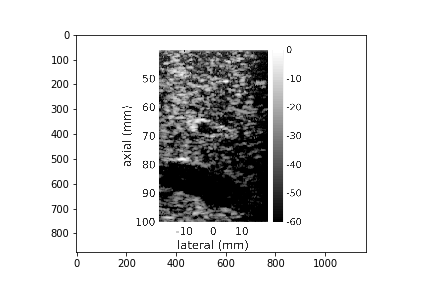
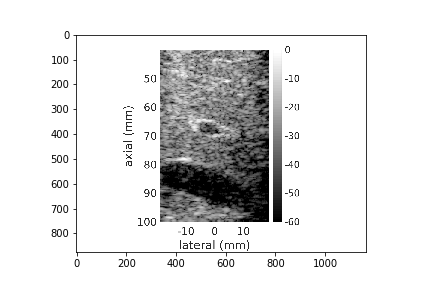
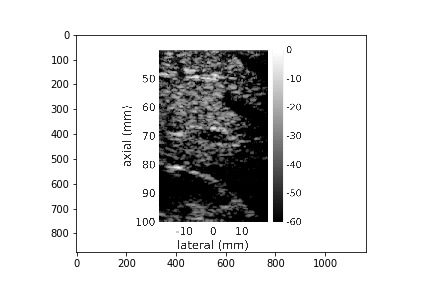
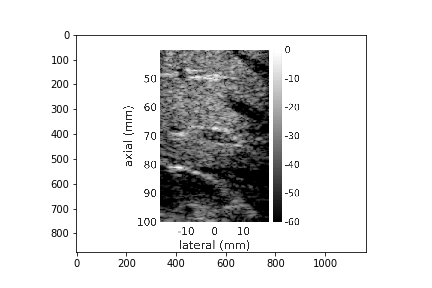
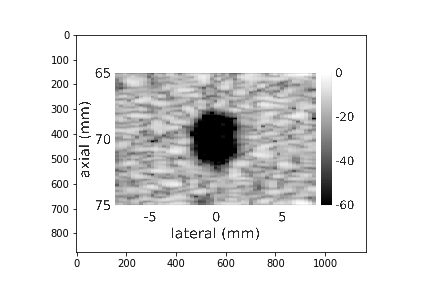
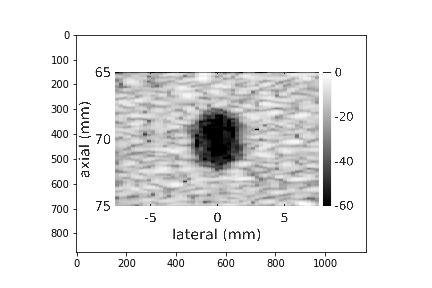
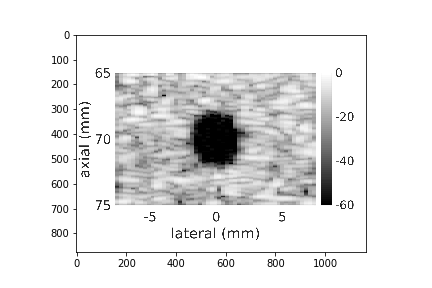
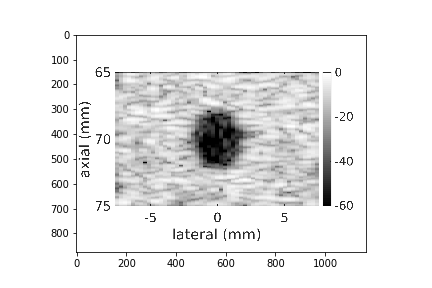
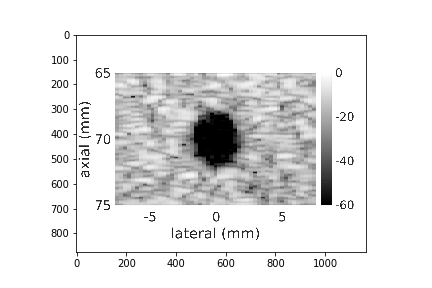
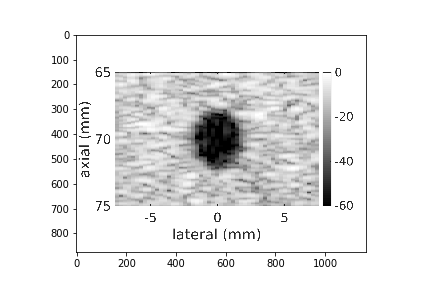
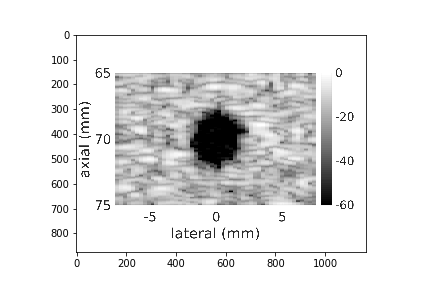
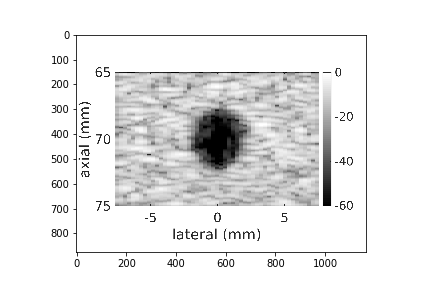
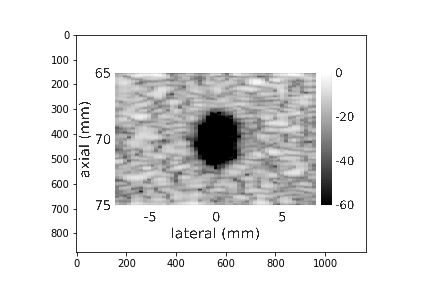
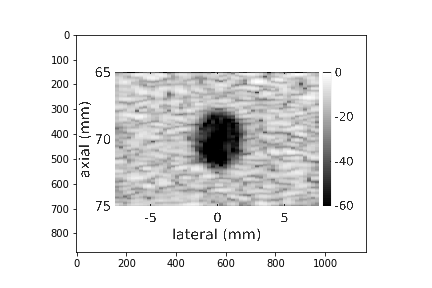
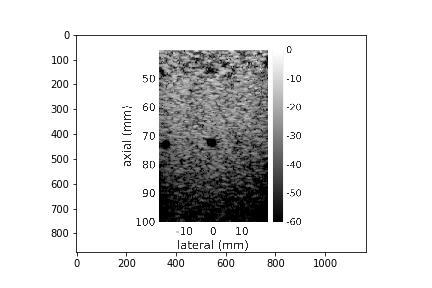
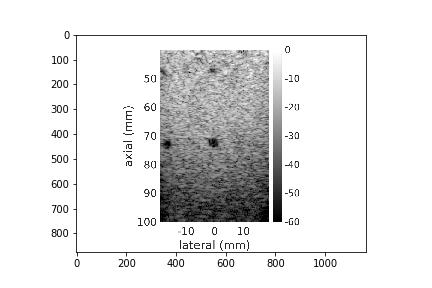
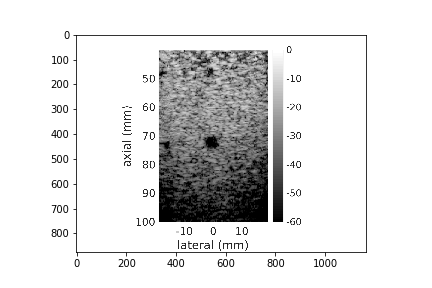
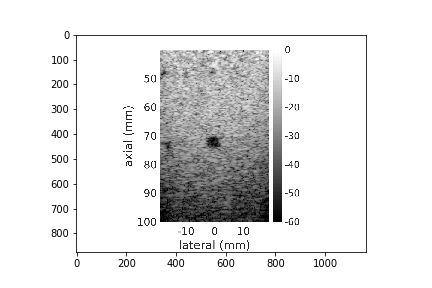
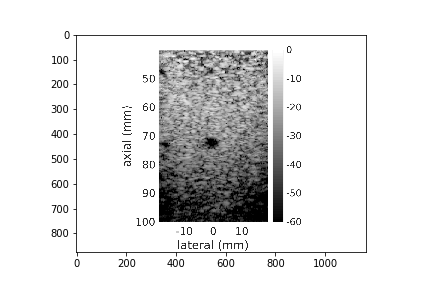
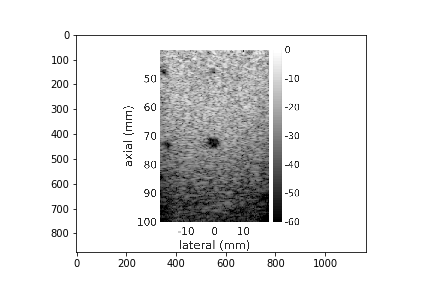
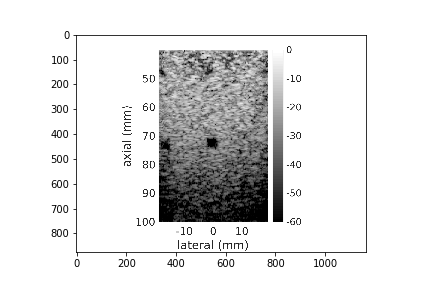
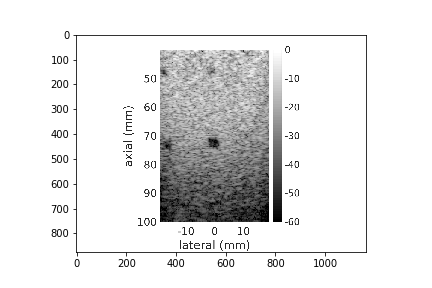
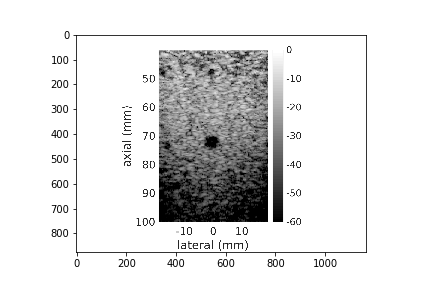
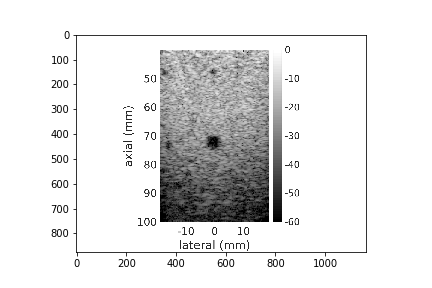

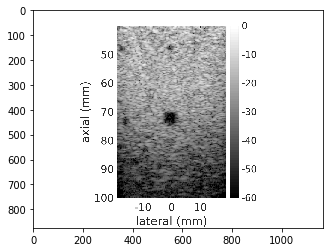

In [15]:
formatters = {
    '20180801163205_32_evaluated_cnn_image': image_formatter,
    '20181025215535_278_evaluated_cnn_image': image_formatter,
}

display(HTML(images_per_target_df[['20180801163205_32_evaluated_cnn_image', '20181025215535_278_evaluated_cnn_image']].to_html(formatters=formatters, escape=False)))


